In [32]:
import os.path
from obspy import read as obspy_read
from obspy.clients.fdsn import Client as FDSN_Client
from obspy.clients.syngine import Client as SYN_Client
from obspy import UTCDateTime
from obspy import read_inventory

In [7]:
START_TIME = UTCDateTime('2023-02-03T00:00:00.0Z')
END_TIME = UTCDateTime('2023-02-10T00:00:00.0Z')
STATION = 'HASN'
NETWORK = 'AB'

In [8]:

# Uncomment this section if you need to download the data again (you should not need to do this)

# client = obspy.clients.fdsn.Client('IRIS')
# st = client.get_waveforms("AB", "HASN", "00", "HH?", START_TIME, END_TIME)
# for tr in st:
#     tr.write('data/' + tr.id + '.MSEED', format='MSEED')
# st = obspy.read('data/AB.HASN.00.HH?.MSEED')

In [18]:
# Download the xml station file
fdsn_client = FDSN_Client('IRIS')
inv = fdsn_client.get_stations(network=NETWORK, station=STATION, starttime=START_TIME, endtime=END_TIME, level='response')
inv.write('data/AB.HASN.xml', format='STATIONXML')

In [19]:
# read the xml station file
inv = read_inventory('data/AB.HASN.xml')
print(inv)

Inventory created at 2024-02-27T09:49:46.575800Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-02-03...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AB
		Stations (1):
			AB.HASN (Hasanabad,Azerbaijan)
		Channels (6):
			AB.HASN.00.HHZ, AB.HASN.00.HHN, AB.HASN.00.HHE, AB.HASN.00.LHZ, 
			AB.HASN.00.LHN, AB.HASN.00.LHE


In [12]:
# function to set up an SDS system
def setup_sds_system(SDSdir, stream, year):
    for tr in stream:
        net, sta, locid, cha = tr.id.split('.')
        path_base = os.path.join(SDSdir, year, net, sta, cha + '.D')
        os.makedirs(path_base, exist_ok=True)
        print(path_base)

In [13]:
# setup_sds_system('data/SDS', st)

data/SDS/2023/AB/HASN/HHE.D
data/SDS/2023/AB/HASN/HHN.D
data/SDS/2023/AB/HASN/HHZ.D


In [34]:
# function to split a stream into an SDS system
def write_stream_to_SDS(SDSdir, stream, year):
    for tr in stream:
        net, sta, locid, cha = tr.id.split('.')
        path_base = os.path.join(SDSdir, year, net, sta, cha + '.D')
        start_time = START_TIME
        while start_time < END_TIME:
            end_time = start_time + 24 * 60 * 60
            filename = f'{path_base}/{tr.id}.D.{start_time.year}.{start_time.julday:03d}'
            print(filename)
            slice = tr.slice(start_time, end_time)
            slice.write(filename, format='MSEED')
            start_time = end_time



In [35]:
# uncomment this section if you need to rebuild the SDS archive
# write_stream_to_SDS('data/SDS', stream=st)

data/SDS/2023/AB/HASN/HHE.D/AB.HASN.00.HHE.D.2023.034
data/SDS/2023/AB/HASN/HHE.D/AB.HASN.00.HHE.D.2023.035
data/SDS/2023/AB/HASN/HHE.D/AB.HASN.00.HHE.D.2023.036
data/SDS/2023/AB/HASN/HHE.D/AB.HASN.00.HHE.D.2023.037
data/SDS/2023/AB/HASN/HHE.D/AB.HASN.00.HHE.D.2023.038
data/SDS/2023/AB/HASN/HHE.D/AB.HASN.00.HHE.D.2023.039
data/SDS/2023/AB/HASN/HHE.D/AB.HASN.00.HHE.D.2023.040
data/SDS/2023/AB/HASN/HHN.D/AB.HASN.00.HHN.D.2023.034
data/SDS/2023/AB/HASN/HHN.D/AB.HASN.00.HHN.D.2023.035
data/SDS/2023/AB/HASN/HHN.D/AB.HASN.00.HHN.D.2023.036
data/SDS/2023/AB/HASN/HHN.D/AB.HASN.00.HHN.D.2023.037
data/SDS/2023/AB/HASN/HHN.D/AB.HASN.00.HHN.D.2023.038
data/SDS/2023/AB/HASN/HHN.D/AB.HASN.00.HHN.D.2023.039
data/SDS/2023/AB/HASN/HHN.D/AB.HASN.00.HHN.D.2023.040
data/SDS/2023/AB/HASN/HHZ.D/AB.HASN.00.HHZ.D.2023.034
data/SDS/2023/AB/HASN/HHZ.D/AB.HASN.00.HHZ.D.2023.035
data/SDS/2023/AB/HASN/HHZ.D/AB.HASN.00.HHZ.D.2023.036
data/SDS/2023/AB/HASN/HHZ.D/AB.HASN.00.HHZ.D.2023.037
data/SDS/2023/AB/HASN/HHZ.D/

In [49]:
st = obspy_read('data/SDS/2023/AB/HASN/HH?.D/AB.HASN.00.HH?.D.2023.037')
st_raw = st.copy()
st.remove_response(inventory=inv)

3 Trace(s) in Stream:
AB.HASN.00.HHE | 2023-02-06T00:00:00.000000Z - 2023-02-07T00:00:00.000000Z | 100.0 Hz, 8640001 samples
AB.HASN.00.HHN | 2023-02-06T00:00:00.000000Z - 2023-02-07T00:00:00.000000Z | 100.0 Hz, 8640001 samples
AB.HASN.00.HHZ | 2023-02-06T00:00:00.000000Z - 2023-02-07T00:00:00.000000Z | 100.0 Hz, 8640001 samples

In [50]:
# st.decimate(factor=5)
# st.decimate(factor=5)
# print(st)

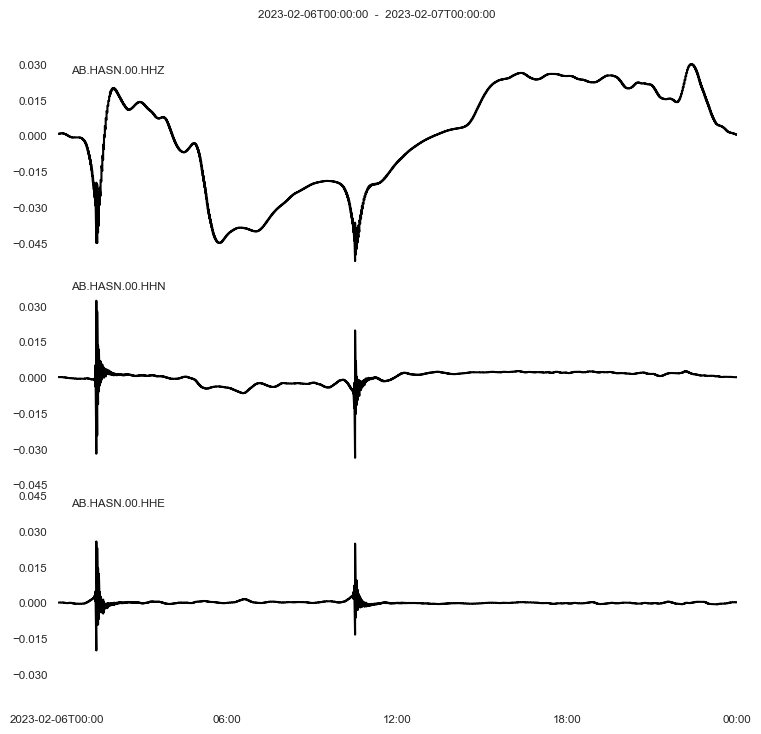

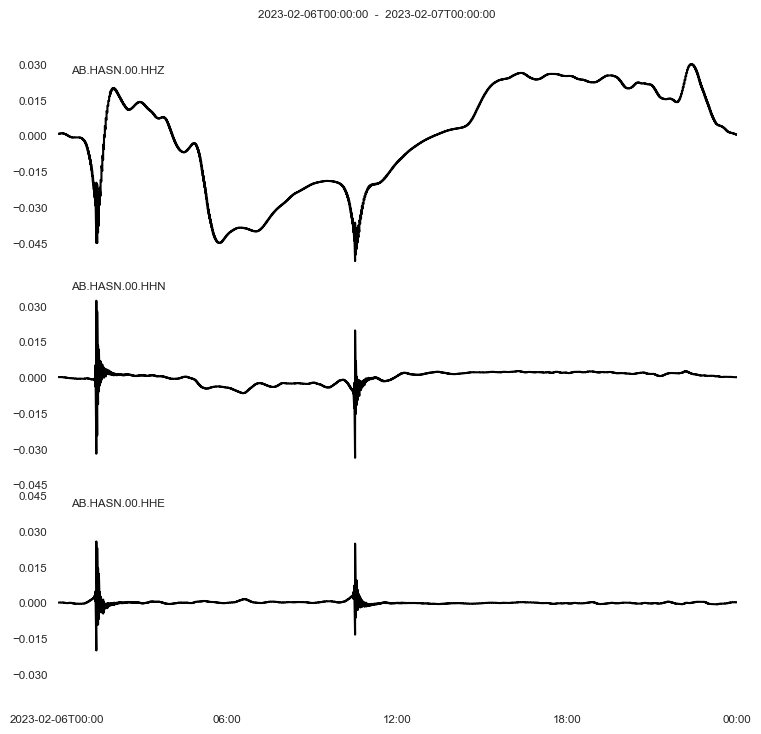

In [51]:
st.plot()

In [52]:
first_event_origin = UTCDateTime('2023-02-06T01:18:10.8')
second_event_origin = UTCDateTime('2023-02-06T10:24:58.8')
slice_1 = st.slice(starttime=first_event_origin+200, endtime=first_event_origin+500)
slice_1_raw = st_raw.slice(starttime=first_event_origin+200, endtime=first_event_origin+500)
slice_2 = st.slice(starttime=second_event_origin+200, endtime=second_event_origin+500)

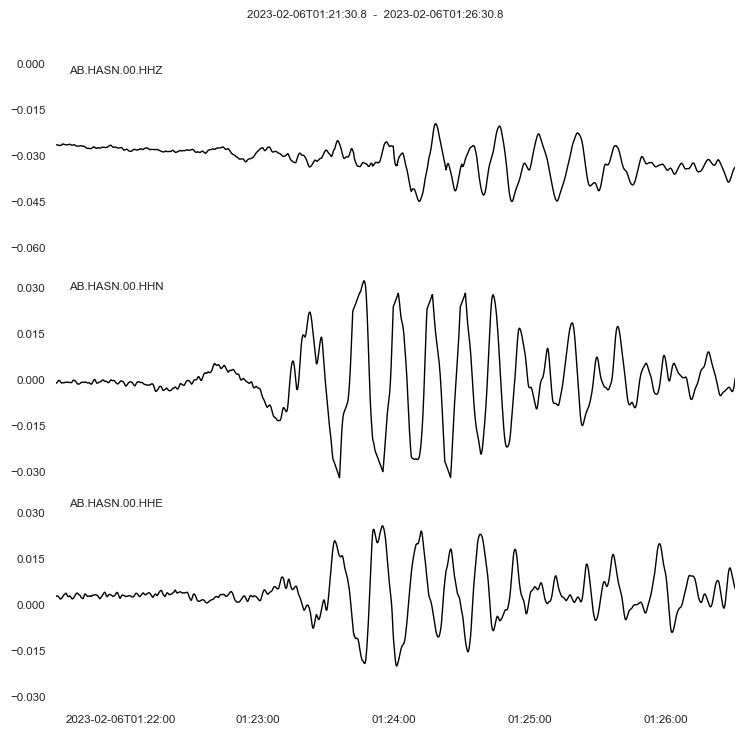

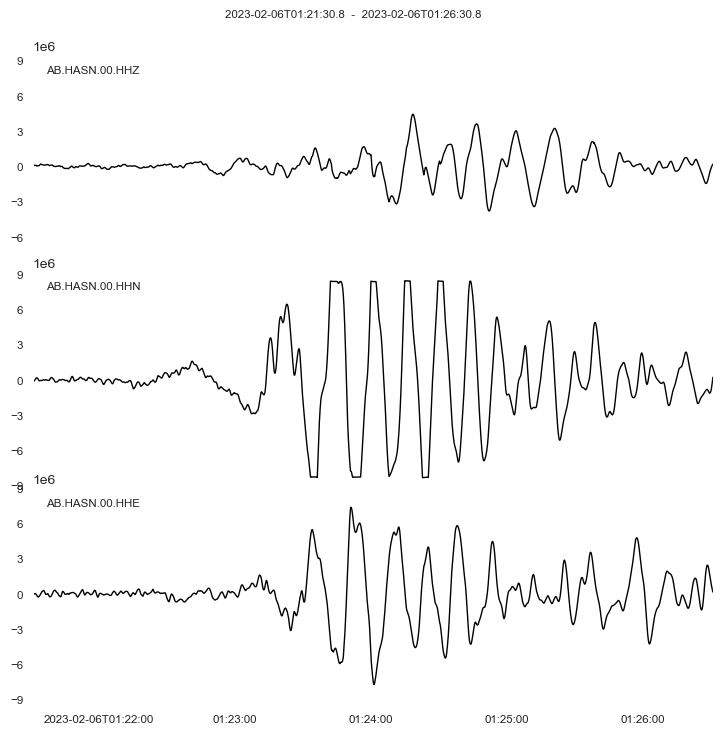

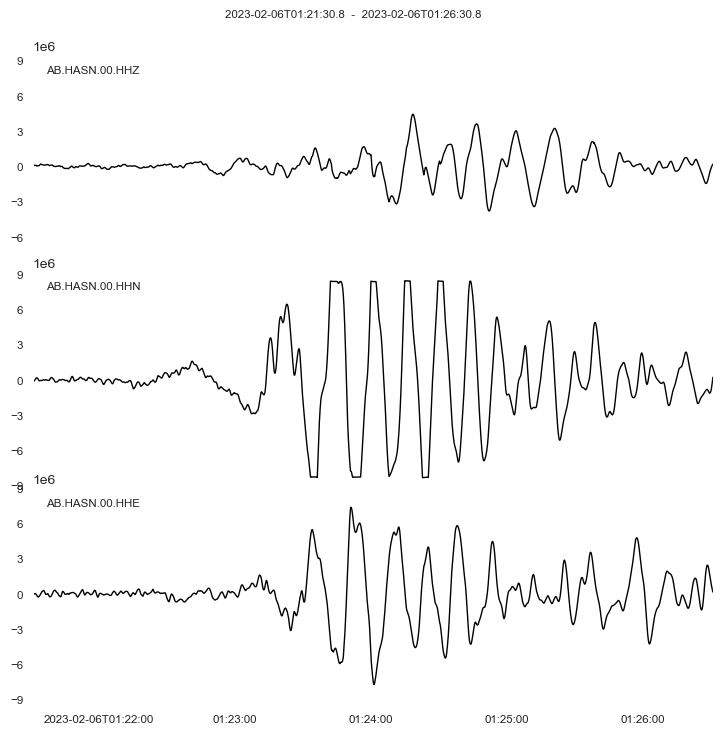

In [53]:
slice_1.plot()
slice_1_raw.plot()

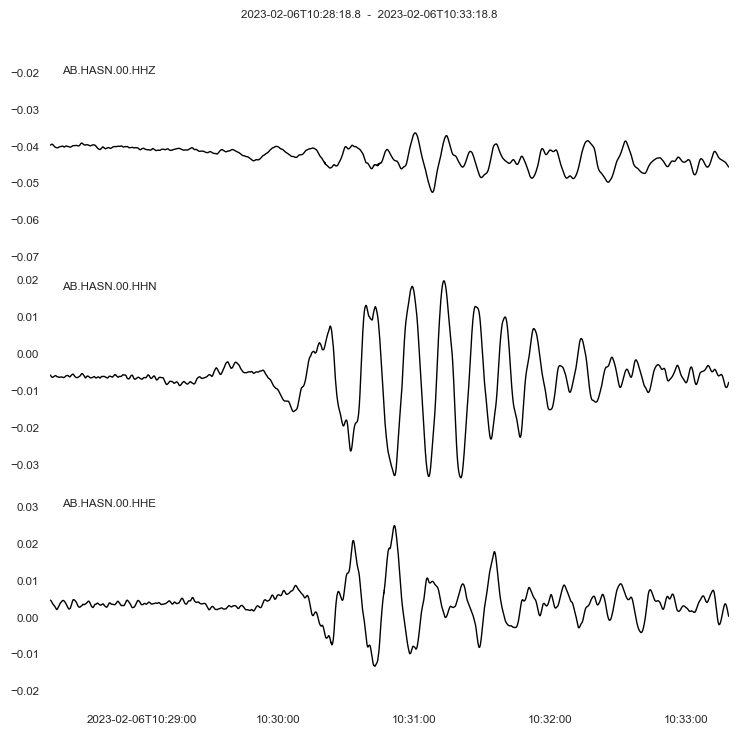

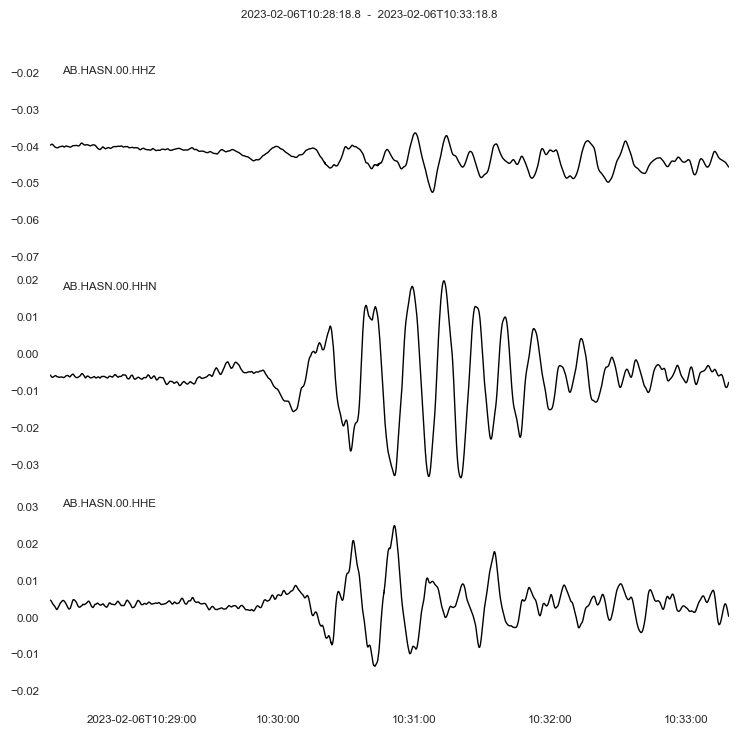

In [54]:
slice_2.plot()

In [55]:
syn_client = SYN_Client()
syn_st = syn_client.get_waveforms(model="ak135f_5s", network=NETWORK, station=STATION, eventid="GCMT:202302060117A")

In [56]:
print(syn_st)

3 Trace(s) in Stream:
AB.HASN.SE.MXZ | 2023-02-06T01:18:10.000000Z - 2023-02-06T02:22:49.750000Z | 4.0 Hz, 15520 samples
AB.HASN.SE.MXN | 2023-02-06T01:18:10.000000Z - 2023-02-06T02:22:49.750000Z | 4.0 Hz, 15520 samples
AB.HASN.SE.MXE | 2023-02-06T01:18:10.000000Z - 2023-02-06T02:22:49.750000Z | 4.0 Hz, 15520 samples


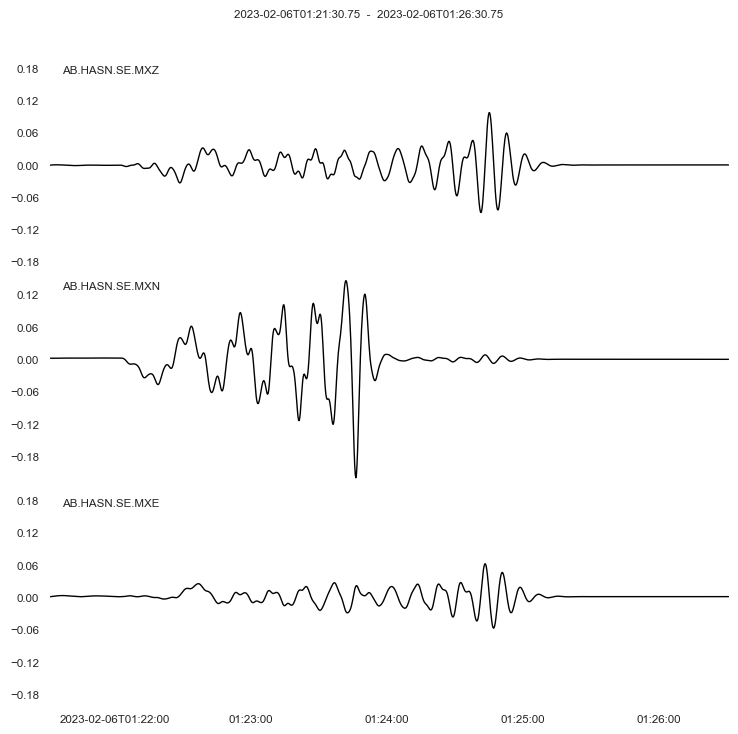

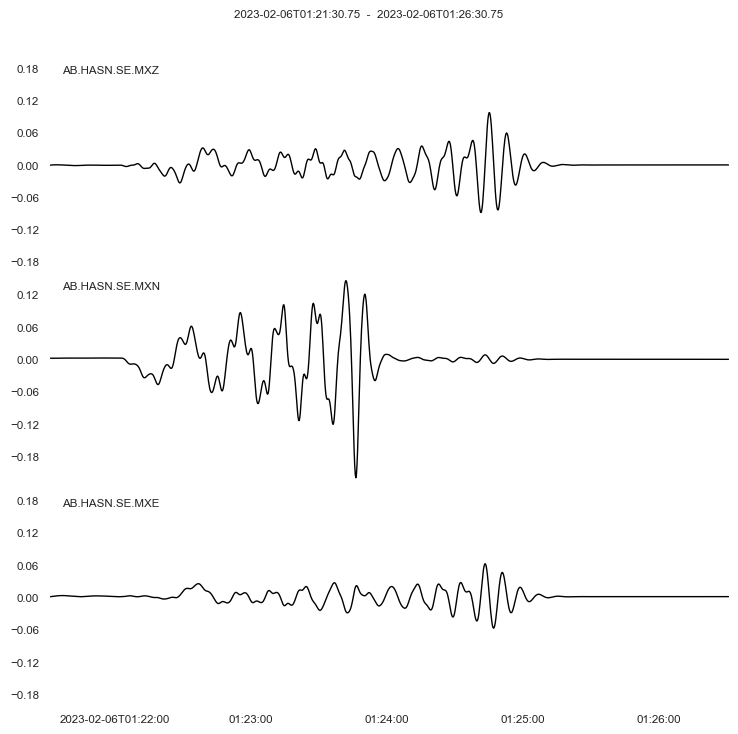

In [57]:
syn_st.trim(starttime=first_event_origin+200, endtime=first_event_origin+500)
syn_st.plot()

1 Trace(s) in Stream:
AB.HASN.SE.MXN | 2023-02-06T01:21:30.750000Z - 2023-02-06T01:26:30.750000Z | 4.0 Hz, 1201 samples
1 Trace(s) in Stream:
AB.HASN.00.HHN | 2023-02-06T01:21:30.800000Z - 2023-02-06T01:26:30.800000Z | 100.0 Hz, 30001 samples


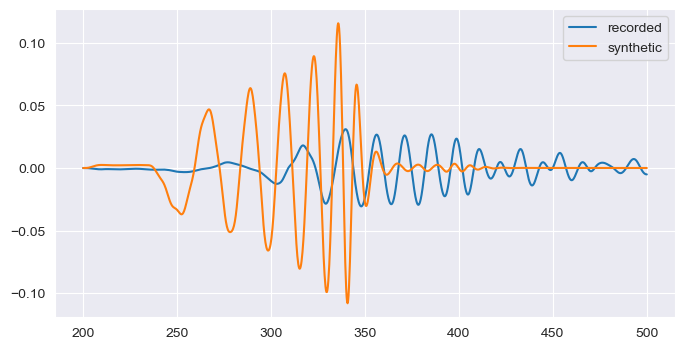

In [62]:
import matplotlib.pyplot as plt
from loc1sta.graphics import create_time_axis

slice_1_N = slice_1.select(channel='HHN').filter('lowpass', freq=0.1)
syn_st_N = syn_st.select(channel='MXN').filter('lowpass', freq=0.1)

print(syn_st_N)
print(slice_1_N)

t_axis_slice_1 = create_time_axis(slice_1_N.traces[0].stats.npts, slice_1_N.traces[0].stats.sampling_rate, zero_shift=-200)
t_axis_syn_st = create_time_axis(syn_st_N.traces[0].stats.npts, syn_st_N.traces[0].stats.sampling_rate, zero_shift=-200)


fig = plt.figure(figsize=(8,4))
plt.plot(t_axis_slice_1, slice_1_N.traces[0].data, label='recorded')
plt.plot(t_axis_syn_st, syn_st_N.traces[0].data, label='synthetic')
plt.legend()